<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>

<center><b>Módulo 4 - Unidad 2 </b></center>
<center><b>Visualización básica</b></center>
<center><b>Caso Práctico</b></center>
<center><b>Adriana Vargas</b></center>

# Caso de Análisis

Datos del referéndum sobre la pertenencia del Reino Unido a la Unión Europea (Brexit), que tuvo lugar el 23 de junio de 2016.

# 1. Exploración del dataset de resultados

Cargamos el dataset result-data, y exploramos su estructura y datos.

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Read de result-data dataset.
df_referendum = pd.read_csv("EU-referendum-result-data.csv")
df_referendum.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,34176,53216,77,0,32,7,38,39.11,60.89,0.09
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,36708,47773,135,0,85,0,50,43.45,56.55,0.16
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,39348,54522,69,0,21,0,48,41.92,58.08,0.07
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,22151,57765,34,0,8,3,23,27.72,72.28,0.04
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,41497,44569,69,0,26,1,42,48.22,51.78,0.08


Tenemos 382 registros, que responden a la votación en 382 áreas y 12 regiones.

Y 21 columnas con información.

In [329]:
df_referendum.shape

(382, 21)

In [330]:
df_referendum["Region"].value_counts()

South East                  67
East                        47
East Midlands               40
North West                  39
South West                  38
London                      33
Scotland                    32
West Midlands               30
Wales                       22
Yorkshire and The Humber    21
North East                  12
Northern Ireland             1
Name: Region, dtype: int64

In [331]:
df_referendum["Region"].nunique()

12

In [332]:
df_referendum.dtypes

id                           int64
Region_Code                 object
Region                      object
Area_Code                   object
Area                        object
Electorate                   int64
ExpectedBallots              int64
VerifiedBallotPapers         int64
Pct_Turnout                float64
Votes_Cast                   int64
Valid_Votes                  int64
Remain                       int64
Leave                        int64
Rejected_Ballots             int64
No_official_mark             int64
Voting_for_both_answers      int64
Writing_or_mark              int64
Unmarked_or_void             int64
Pct_Remain                 float64
Pct_Leave                  float64
Pct_Rejected               float64
dtype: object

No hay datos duplicados.

In [333]:
df_referendum.duplicated(keep='first').sum()

0

No hay datos nulos.

In [334]:
df_referendum.isnull().sum()

id                         0
Region_Code                0
Region                     0
Area_Code                  0
Area                       0
Electorate                 0
ExpectedBallots            0
VerifiedBallotPapers       0
Pct_Turnout                0
Votes_Cast                 0
Valid_Votes                0
Remain                     0
Leave                      0
Rejected_Ballots           0
No_official_mark           0
Voting_for_both_answers    0
Writing_or_mark            0
Unmarked_or_void           0
Pct_Remain                 0
Pct_Leave                  0
Pct_Rejected               0
dtype: int64

In [335]:
df_referendum.describe()

,id,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
count,382.000000,3.820000e+02,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,191.500000,1.217278e+05,87904.429319,87900.620419,73.754764,87898.801047,87832.416230,42254.557592,45577.858639,66.384817,0.607330,23.780105,2.188482,39.808901,47.010995,52.989005,0.073037
std,110.418145,9.706175e+04,63611.874911,63605.668481,5.099413,63603.499333,63554.624962,35622.620732,31308.892098,59.451306,2.851117,27.232427,3.306888,32.476240,10.696521,10.696521,0.027811
min,1.000000,1.799000e+03,1424.000000,1424.000000,56.250000,1424.000000,1424.000000,803.000000,621.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.440000,4.090000,0.000000
25%,96.250000,7.252375e+04,54878.500000,54877.500000,70.270000,54875.500000,54844.250000,23535.250000,28668.500000,33.250000,0.000000,10.000000,0.000000,21.000000,39.655000,47.142500,0.060000
50%,191.500000,9.642550e+04,72544.500000,72544.000000,74.345000,72544.500000,72511.500000,33475.000000,37573.500000,46.500000,0.000000,16.000000,1.000000,30.000000,45.735000,54.265000,0.070000
75%,286.750000,1.413798e+05,104436.500000,104436.500000,77.905000,104436.500000,104332.000000,48245.500000,54137.500000,74.000000,0.000000,27.000000,3.000000,45.000000,52.857500,60.345000,0.080000
max,382.000000,1.260955e+06,790647.000000,790523.000000,83.640000,790523.000000,790149.000000,440707.000000,349442.000000,614.000000,39.000000,311.000000,35.000000,286.000000,95.910000,75.560000,0.240000


No se consideran modificaciones adicionales al dataset, dado que no hay elementos duplicados, ni nulos.

# 2. Calculamos quien está a favor de continuar en la UE y quien no

Las columnas **Remain** y **Leave** nos permitirán determinar quienes estuvieron a favor de continuar en la UE (Remain) y quienes en contra (Leave).

In [336]:
# Total of people in favor or against of remaining in the EU
leave_ue = df_referendum["Leave"].sum()
remain_ue = df_referendum["Remain"].sum()
total_votes = remain_ue + leave_ue

# Calculate the percentages
pct_leave = leave_ue / total_votes * 100
pct_remain = remain_ue / total_votes * 100

print("Calculando los porcentajes:")
print("Total votos a favor de dejar la UE: ", round(leave_ue, 2))
print("Total votos a favor de permanecer en la UE: ", round(remain_ue, 2))
print("Total votos: ", round(total_votes, 2))
print("\n")
print("El porcentaje a favor de dejar la UE es:", round(pct_leave,2))
print("El porcentaje a favor de permanecer en la UE es:", round(pct_remain, 2))


Calculando los porcentajes:
Total votos a favor de dejar la UE:  17410742
Total votos a favor de permanecer en la UE:  16141241
Total votos:  33551983


El porcentaje a favor de dejar la UE es: 51.89
El porcentaje a favor de permanecer en la UE es: 48.11


Gráfico de personas a favor y en contra de dejar la UE:

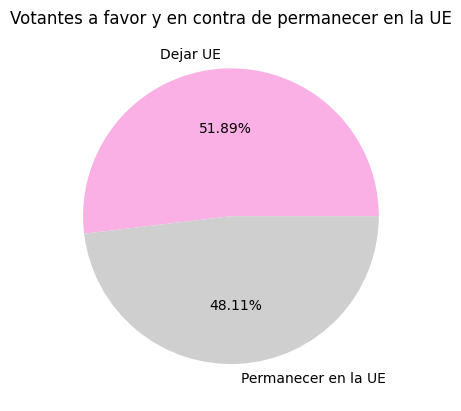

In [337]:
# Define data
data = [ leave_ue, remain_ue]

# Create pie chart
colors = sns.color_palette("pastel")[6:8]
labels = ["Dejar UE","Permanecer en la UE"]
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.title("Votantes a favor y en contra de permanecer en la UE")
plt.show()

# 3. Calcular el censo, porcentaje de votantes y rechazados

In [338]:
# Total of voters
leave_ue = df_referendum["Leave"].sum()
remain_ue = df_referendum["Remain"].sum()
valids = remain_ue + leave_ue
rejecteds = df_referendum["Rejected_Ballots"].sum()
total_voters = valids + rejecteds

# Calculate the percentages
pct_voters = valids / total_voters * 100
pct_rejecteds = rejecteds / total_voters * 100

print("Calculando los porcentajes manualmente:")
print("Total votantes (censo): ", total_voters)
print("Total votos válidos: ", valids)
print("Total votos rechazados: ", rejecteds)
print("\n")
print("El porcentaje de votos válidos:", round(pct_voters,2))
print("El porcentaje de votos inválidos:", round(pct_rejecteds, 2))
print("\n")

Calculando los porcentajes manualmente:
Total votantes (censo):  33577342
Total votos válidos:  33551983
Total votos rechazados:  25359


El porcentaje de votos válidos: 99.92
El porcentaje de votos inválidos: 0.08




Gráfico de votos válidos vs rechazados:

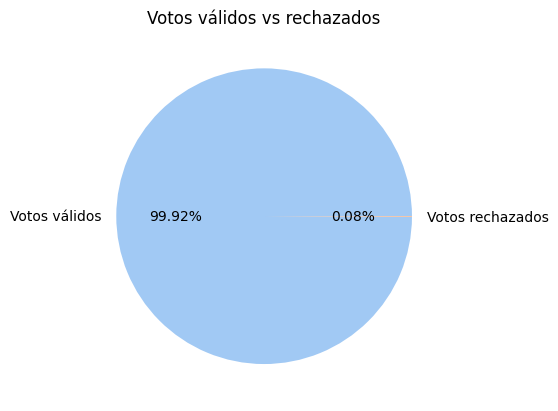

In [339]:
# Define data
data = [ valids, rejecteds]

# Create pie chart
colors = sns.color_palette("pastel")[0:2]
labels = ["Votos válidos","Votos rechazados"]
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.title("Votos válidos vs rechazados")
plt.show()

# 4. ¿Cuáles serán los condados más a favor de la UE y cuáles serán menos?

Top 8 de las áreas con votación más alta a favor de dejar la UE.

<ipython-input-340-744d4cc7b3ba>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_areas = df_referendum.groupby("Area").sum()


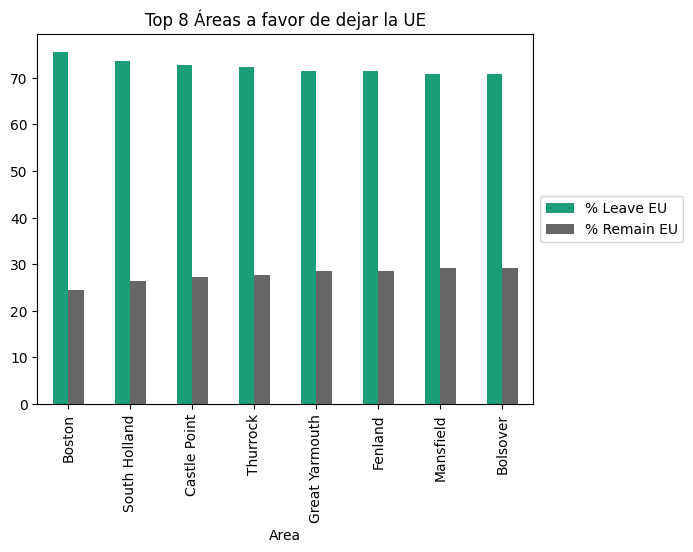

In [340]:
# Group by area with totals of Leave/Remain and calculate percentages
df_areas = df_referendum.groupby("Area").sum()
df_areas["Pct_noEU"] = df_areas["Leave"] / (df_areas["Remain"] + df_areas["Leave"]) * 100
df_areas["Pct_yesEU"] = df_areas["Remain"] / (df_areas["Remain"] + df_areas["Leave"]) * 100

# Sort the dataset grouped by area, by Leave descending and get the 8 first values
top8_Leave = df_areas[["Pct_noEU", "Pct_yesEU"]].sort_values(by="Pct_noEU", ascending=False)[0:8]

# Plot Top 8 areas wanting to leave the EU
top8_Leave.plot(kind="bar", cmap = 'Dark2')
plt.title("Top 8 Áreas a favor de dejar la UE")
plt.legend(["% Leave EU","% Remain EU"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Top 8 de las áreas con votación más alta a favor de permanecer en la UE.

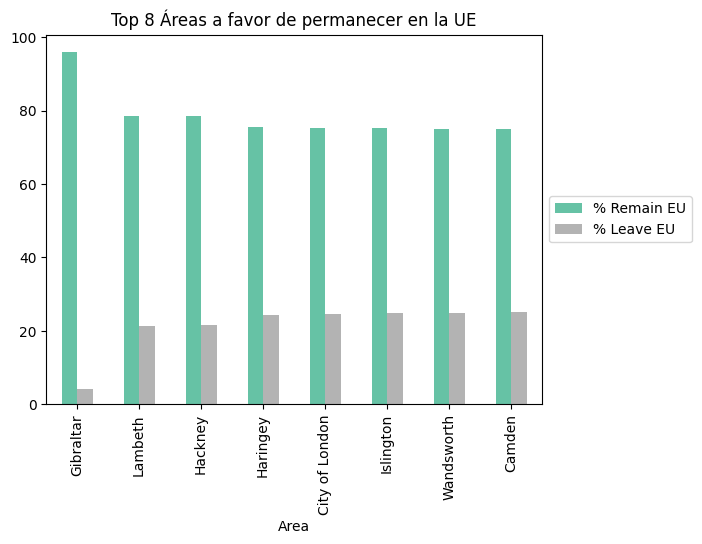

In [341]:
# Sort the dataset grouped by area, by Remain descending and get the 8 first values
top8_Remain = df_areas[["Pct_yesEU", "Pct_noEU"]].sort_values(by="Pct_yesEU", ascending=False)[0:8]

# Plot Top 8 areas wanting to remain in the EU
top8_Remain.plot(kind="bar", cmap = 'Set2')
plt.title("Top 8 Áreas a favor de permanecer en la UE")
plt.legend(["% Remain EU","% Leave EU"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Top 8 de las regiones con votación más alta a favor de dejar la UE.

<ipython-input-342-1efcdd3b987f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_regions = df_referendum.groupby("Region").sum()


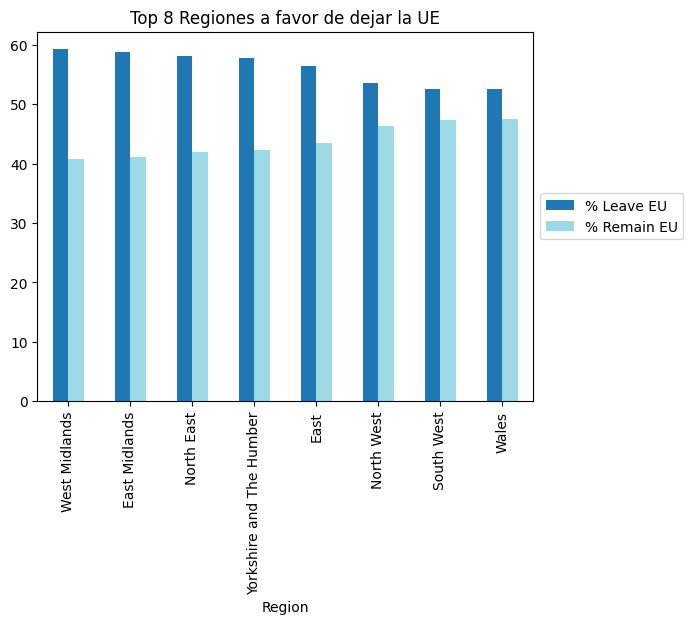

In [342]:
# Group by region with totals of Leave/Remain and calculate percentages
df_regions = df_referendum.groupby("Region").sum()
df_regions["Pct_noEU"] = df_regions["Leave"] / (df_regions["Remain"] + df_regions["Leave"]) * 100
df_regions["Pct_yesEU"] = df_regions["Remain"] / (df_regions["Remain"] + df_regions["Leave"]) * 100

# Sort the dataset grouped by region, by Leave descending and get the 8 first values
top8_Leave = df_regions[["Pct_noEU", "Pct_yesEU"]].sort_values(by="Pct_noEU", ascending=False)[0:8]

# Plot Top 8 regions wanting to leave the EU
top8_Leave.plot(kind="bar", cmap = 'tab20')
plt.title("Top 8 Regiones a favor de dejar la UE")
plt.legend(["% Leave EU","% Remain EU"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Top 8 de las regiones con votación más alta a favor de permanecer en la UE.

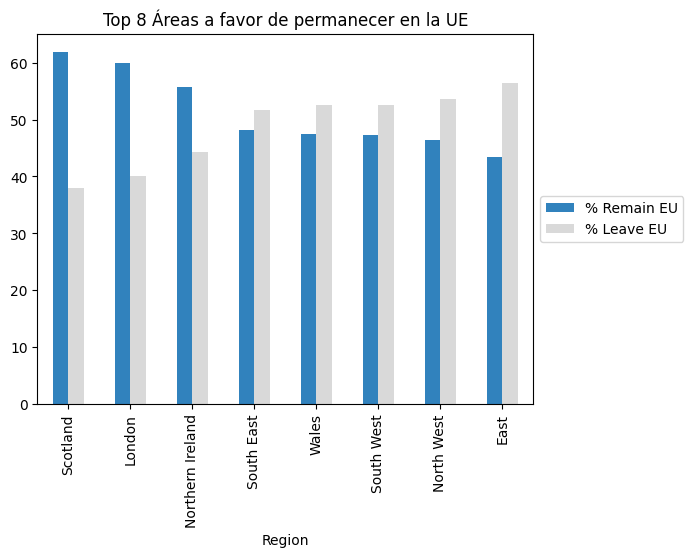

In [343]:
# Sort the dataset grouped by region, by Remain descending and get the 8 first values
top8_Remain = df_regions[["Pct_yesEU", "Pct_noEU"]].sort_values(by="Pct_yesEU", ascending=False)[0:8]

# Plot Top 8 regions wanting to remain in the EU
top8_Remain.plot(kind="bar", cmap = 'tab20c')
plt.title("Top 8 Áreas a favor de permanecer en la UE")
plt.legend(["% Remain EU","% Leave EU"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Incluso algunas áreas en el top 8 de valores más altos a favor de permanecer en la UE, presentan valores más altos en la votación a favor de dejar la UE.

# 5. Influencia de otras variables en la votación

Adicional al dataset de resultados de Referendum, disponemos de los siguientes datasets del censo de 2011, que aportan detalle de otras variables que pueden ser analizadas en el contexto del Referendum:

* **Edad** 
  * File: r21ewrttableks102ewladv1_tcm77-290566.xls
  * Descripción: Table KS102EW, 2011 Census: Age structure, local authorities in England and Wales.
* **Nivel de educación**
  * File: r21ewrttableks501ewladv1_tcm77-290734.xls
  * Descripción: Table KS501EW, 2011 Census: Qualifications and students, local authorities in England and Wales.
* **Gente de RU que no vive en RU**
  * File: r21ewrttableqs203ewladv1_tcm77-290919.xls
  * Descripción: Table QS203EW, 2011 Census: Country of birth (detailed), local authorities in England and Wales.
* **Ingresos salariales**
  * File: NS_Table_3_13_1415.xlsx
  * Descripción: Income and tax by county and region, 2014-15.
* **Gente sin trabajo**
  * File: r21ewrttableks601ewladv1_tcm77-290745.xls
  * Descripción: Table KS601EW, 2011 Census: Economic activity, local authorities in England and Wales.

**Notas:** 
* Todos los datasets del Census 2011 tienen la misma estructura y los datos de análisis se encuentran en la hoja con sufijo _Numbers o _Percentages, de acuerdo al caso.
* Solo fue posible cruzar los nombres de algunas Regiones en el dataframe de resultado del Referendo, con el dataset de Ingresos salariales. No fue posible obtener datos por áreas, dado que los nombres no cruzan los códigos de área no están en el dataset
* En general en los datasets de las variables, no hay datos para las regiones Scotland y Northern Ireland, por lo que los resultados abarcan 10 regiones, y no 12 como originalmente tenía el dataset de resultados.

Antes de iniciar generamos una función para la creación de un gráfico combinado de una variable vs los votantes a favor y en contra de deja la UE, que será reutilizado para visualizar la relación de la variable en análisis con e número de votantes.

In [344]:
# Function to plot a combined chart for a variable vs voters (leave and remain)

def chart_voters(frequency_col, exposition, title, label, colors):
  fig = plt.figure(figsize=(10,6))
  
  ax = frequency_col.plot(kind='bar', grid=True, color=colors[0])
  ax.set_ylabel(label)
  ax.set_title(title)
  
  ax2 = ax.twinx()
  ax2.plot(exposition['Leave'].values, linestyle='-', linewidth=2.0, label='Dejar la UE', color=colors[1])
  ax2.legend(loc='upper center')
  ax2.yaxis.set_label_coords(1.06, 1)
  ax2.set_ylabel("Millones de votos")
  ax2.yaxis.set_ticks([])
  
  ax3 = ax2.twinx()
  ax3.plot(exposition['Remain'].values, linestyle='-', linewidth=2.0, label='Permanecer en la UE', color=colors[2])
  ax3.legend(loc='upper right')
  ax3.set_ylim(ax2.get_ylim())
  
  plt.show()


## 5.1. Edad

Cargamos en un dataframe la hoja **KS102EW_Numbers** y exploramos su estructura y datos.

In [345]:
age_file = "r21ewrttableks102ewladv1_tcm77-290566.xls"

df_age = pd.read_excel(io=age_file, sheet_name="KS102EW_Numbers", header=10, usecols=("A:W"), skiprows=[11,12,13])
df_age.head()

,Area code,Area name,Unnamed: 2,Unnamed: 3,All categories: Age,Age 0 to 4,Age 5 to 7,Age 8 to 9,Age 10 to 14,Age 15,...,Age 25 to 29,Age 30 to 44,Age 45 to 59,Age 60 to 64,Age 65 to 74,Age 75 to 84,Age 85 to 89,Age 90 and over,Mean age,Median age
0,K04000001,ENGLAND AND WALES,NaN,NaN,56075912.0,3496750.0,1927039.0,1208672.0,3258677.0,687994.0,...,3836609.0,11515165.0,10886135.0,3377162.0,4852833.0,3115552.0,825671.0,429017.0,39.4,39.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E92000001,ENGLAND,NaN,NaN,53012456.0,3318449.0,1827610.0,1145022.0,3080929.0,650826.0,...,3650881.0,10944271.0,10276902.0,3172277.0,4552283.0,2928118.0,776311.0,403817.0,39.3,39.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E12000001,NORTH EAST,NaN,NaN,2596886.0,149843.0,83689.0,52610.0,145045.0,31250.0,...,164303.0,491533.0,538344.0,168576.0,239242.0,154863.0,37546.0,17834.0,40.3,41.0


Removemos nulos y nos quedamos con un dataset que contenga únicamente un Área válida y una mediana de edad por área válida.

In [346]:
df_age.rename(index=str, inplace=True, columns={"Area code": "Area_Code", })
df_age.rename(index=str, inplace=True, columns={"Median age": "Median_Age", })
df_age = df_age[["Area_Code", "Median_Age"]]
df_age = df_age.dropna(how='any')
df_age.head()

,Area_Code,Median_Age
0,K04000001,39.0
2,E92000001,39.0
4,E12000001,41.0
6,E06000047,42.0
7,E06000005,41.0


In [347]:
df_age.isnull().sum()

Area_Code     0
Median_Age    0
dtype: int64

Hacemos merge de la edad media por área al dataframe del Referendum.

In [348]:
df_referendum = df_referendum.merge(df_age, on='Area_Code')
df_referendum.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected,Median_Age
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,53216,77,0,32,7,38,39.11,60.89,0.09,35.0
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,47773,135,0,85,0,50,43.45,56.55,0.16,32.0
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,54522,69,0,21,0,48,41.92,58.08,0.07,40.0
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,57765,34,0,8,3,23,27.72,72.28,0.04,36.0
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,44569,69,0,26,1,42,48.22,51.78,0.08,39.0


Ahora generamos un gráfico combinado de la mediana de edad por Región (eje izquierdo), junto con los votos a favor y encontra de dejar la UE (eje derecho).

<ipython-input-349-1082bb9ff8a9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  frequency = df_referendum.groupby("Region").mean()
<ipython-input-349-1082bb9ff8a9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exposition = df_referendum.groupby("Region").sum()


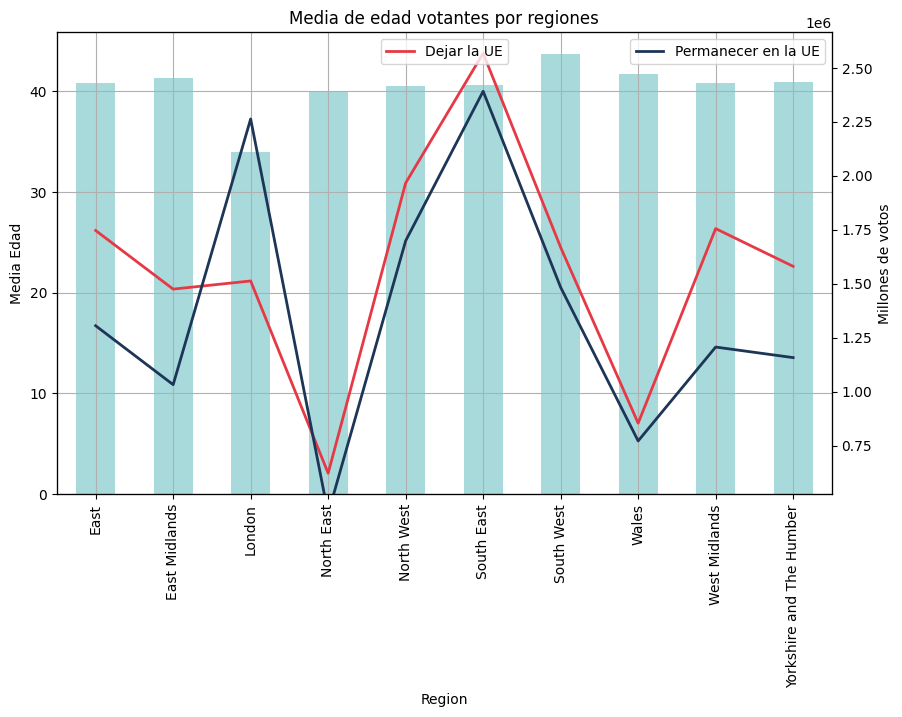

In [349]:
frequency = df_referendum.groupby("Region").mean()
exposition = df_referendum.groupby("Region").sum()

chart_voters(frequency['Median_Age'], exposition, 'Media de edad votantes por regiones', 
             'Media Edad', ['#a8dadc', '#e63946', '#1d3557'])

Por ejemplo London tiene una mediana de edad de 34 años (eje izquierdo), 1513232 a favor de dejar la UE, y 2263519 a favor de permanecer en la UE (eje derecho).

West Midlands una mediana de edad de 41 años, 1755687 a favor de dejar la UE, y 1207175 a favor de permanecer en la UE.

In [350]:
print(frequency.loc[['London'],['Median_Age']])
print(exposition.loc[['London'],['Remain','Leave']])

        Median_Age
Region            
London   33.969697
         Remain    Leave
Region                  
London  2263519  1513232


In [351]:
print(frequency.loc[['West Midlands'],['Median_Age']])
print(exposition.loc[['West Midlands'],['Remain','Leave']])

               Median_Age
Region                   
West Midlands   40.833333
                Remain    Leave
Region                         
West Midlands  1207175  1755687


## 5.2. Nivel de educación

Cargamos en un dataframe la hoja **KS501EW_Numbers** y exploramos su estructura y datos.

In [352]:
education_file = "r21ewrttableks501ewladv1_tcm77-290734.xls"

df_education = pd.read_excel(io=education_file, sheet_name="KS501EW_Numbers", header=10, usecols=("A,E,J,K"), skiprows=[11,12,13])
df_education.head()

,Area code,All categories: Highest level of qualification,Highest level of qualification: Level 3 qualifications,Highest level of qualification: Level 4 qualifications and above
0,NaN,NaN,NaN,NaN
1,K04000001,45496780.0,5617802.0,12383477.0
2,NaN,NaN,NaN,NaN
3,E92000001,42989620.0,5309631.0,11769361.0
4,NaN,NaN,NaN,NaN


Removemos nulos y nos quedamos con un dataset que contenga únicamente un Área válida y calculamos el porcentaje de personas con un nivel alto de educación.

In [353]:
df_education.rename(index=str, inplace=True, columns={"Area code": "Area_Code", })
df_education["Pct_High_Education"] = (df_education[df_education.columns[2]] + df_education[df_education.columns[3]]) / df_education[df_education.columns[1]] * 100
df_education = df_education[["Area_Code", "Pct_High_Education"]]
df_education = df_education.dropna(how='any')
df_education.head()

,Area_Code,Pct_High_Education
1,K04000001,39.566051
3,E92000001,39.728176
5,E12000001,35.281939
7,E06000047,35.085995
8,E06000005,36.466839


Hacemos merge de porcentaje de alto nivel educativo por área al dataframe del Referendum.

In [354]:
df_referendum = df_referendum.merge(df_education, on='Area_Code')
df_referendum.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected,Median_Age,Pct_High_Education
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,77,0,32,7,38,39.11,60.89,0.09,35.0,31.028063
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,135,0,85,0,50,43.45,56.55,0.16,32.0,33.331842
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,69,0,21,0,48,41.92,58.08,0.07,40.0,33.242546
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,34,0,8,3,23,27.72,72.28,0.04,36.0,28.363059
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,69,0,26,1,42,48.22,51.78,0.08,39.0,39.960753


Ahora generamos un gráfico combinado del porcentaje del nivel educativo alto por Región, junto con los votos a favor y encontra de dejar la UE.

<ipython-input-355-242871831197>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  frequency = df_referendum.groupby("Region").mean()
<ipython-input-355-242871831197>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exposition = df_referendum.groupby("Region").sum()


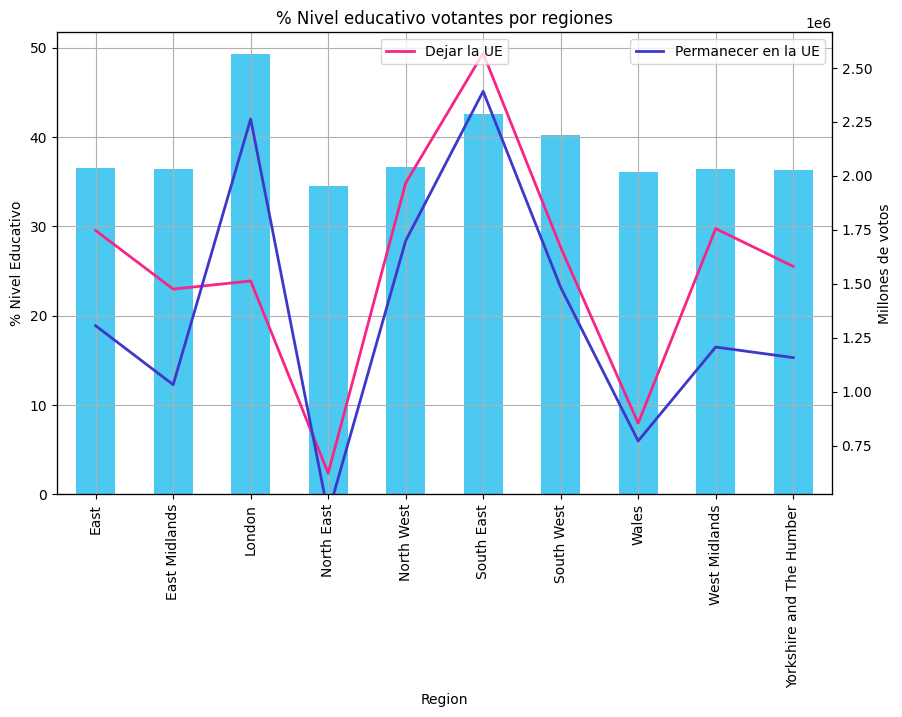

In [355]:
frequency = df_referendum.groupby("Region").mean()
exposition = df_referendum.groupby("Region").sum()

chart_voters(frequency['Pct_High_Education'], exposition, '% Nivel educativo votantes por regiones', 
             '% Nivel Educativo', ['#4cc9f0', '#f72585', '#3f37c9'])

## 5.3. Gente que no vive en RU

Cargamos en un dataframe la hoja **QS203EW_Percentages** y exploramos su estructura y datos.

In [356]:
expats_file = "r21ewrttableqs203ewladv1_tcm77-290919.xls"

df_expats = pd.read_excel(io=expats_file, sheet_name="QS203EW_Percentages", header=10, usecols=("A,G"), skiprows=[11,12,13])
df_expats.head()

,Area code,Europe: United Kingdom: Total
0,K04000001,86.6
1,NaN,NaN
2,E92000001,86.2
3,NaN,NaN
4,E12000001,95.0


Removemos nulos y nos quedamos con un dataset que contenga únicamente un Área válida y calculamos el porcentaje de personas que no viven en el Reino Unido.

In [357]:
df_expats.rename(index=str, inplace=True, columns={"Area code": "Area_Code", })
df_expats["Pct_No_UK"] = 100 - df_expats[df_expats.columns[1]]
df_expats = df_expats[["Area_Code", "Pct_No_UK"]]
df_expats = df_expats.dropna(how='any')
df_expats.head()

,Area_Code,Pct_No_UK
0,K04000001,13.4
2,E92000001,13.8
4,E12000001,5.0
6,E06000047,3.2
7,E06000005,5.2


Hacemos merge del porcentaje de residentes fuera del Reino Unido por área al dataframe del Referendum.

In [358]:
df_referendum = df_referendum.merge(df_expats, on='Area_Code')
df_referendum.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected,Median_Age,Pct_High_Education,Pct_No_UK
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,0,32,7,38,39.11,60.89,0.09,35.0,31.028063,20.6
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,0,85,0,50,43.45,56.55,0.16,32.0,33.331842,30.9
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,0,21,0,48,41.92,58.08,0.07,40.0,33.242546,9.9
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,0,8,3,23,27.72,72.28,0.04,36.0,28.363059,12.0
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,0,26,1,42,48.22,51.78,0.08,39.0,39.960753,17.6


Ahora generamos un gráfico combinado del porcentaje de residentes fuera del Reino Unido por Región, junto con los votos a favor y encontra de dejar la UE.

<ipython-input-359-5f210f821798>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  frequency = df_referendum.groupby("Region").mean()
<ipython-input-359-5f210f821798>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exposition = df_referendum.groupby("Region").sum()


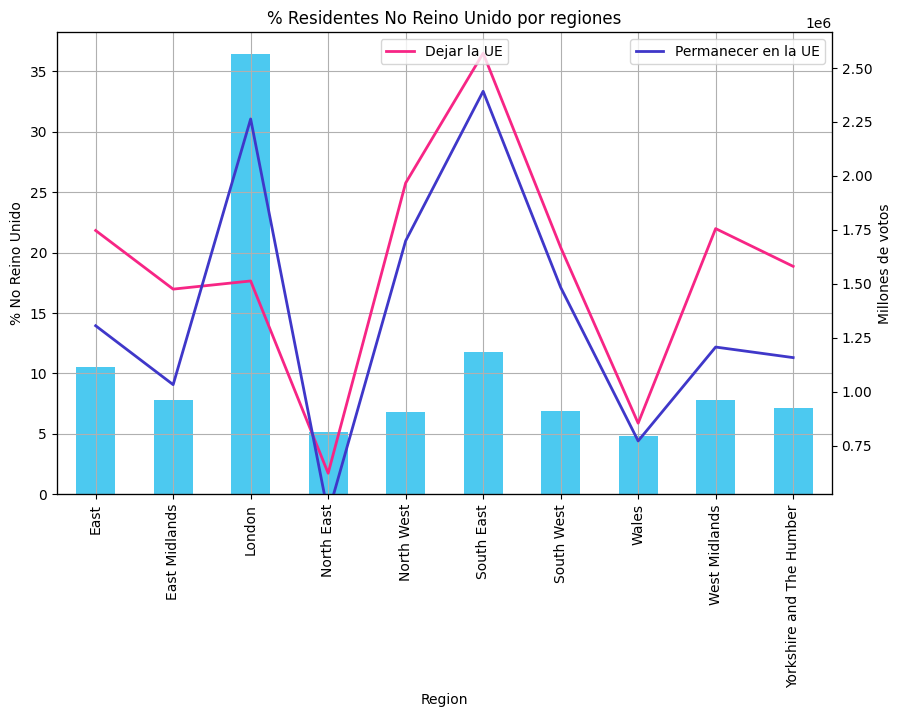

In [359]:
frequency = df_referendum.groupby("Region").mean()
exposition = df_referendum.groupby("Region").sum()

chart_voters(frequency['Pct_No_UK'], exposition, '% Residentes No Reino Unido por regiones', 
             '% No Reino Unido', ['#4cc9f0', '#f72585', '#3f37c9'])

## 5.4. Ingresos salariales

Cargamos en un dataframe la hoja **Table 3.13**.

Capturamos la columna que incluye la media del total de ingresos por región.

In [362]:
income_file = "NS_Table_3_13_1415.xlsx"

df_income = pd.read_excel(io=income_file, sheet_name="Table 3.13", header=18, usecols=("A,T"), names=['Region', 'Mean_Income'])
df_income = df_income.dropna(how='any')
df_income['Region'] = df_income['Region'].str.strip()
df_income.head()

,Region,Mean_Income
0,North East,26600.0
1,Tyne & Wear,26400.0
2,Unitary Authorities,26600.0
5,North West,28000.0
6,Cumbria,27100.0


Nos quedamos únicamente con las regiones, dado que los nombres de áreas no cruzan con los datos de Referendum.

In [363]:
regions = df_referendum["Region"].unique()
df_income = df_income[df_income['Region'].isin(regions)]
df_income = df_income.drop_duplicates(subset='Region', keep="first")
df_income.head()

,Region,Mean_Income
0,North East,26600.0
5,North West,28000.0
20,East Midlands,28200.0
29,West Midlands,27700.0
46,London,44000.0


Hacemos merge de la media de ingresos totales por región a un nuevo dataframe basado en el dataframe del Referendum, agrupado por región.

In [364]:
df_regions = df_referendum.groupby("Region").sum()
df_regions = df_regions.merge(df_income, on='Region')
df_regions.head()

<ipython-input-364-a8dbc186778f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_regions = df_referendum.groupby("Region").sum()


,Region,id,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,...,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected,Median_Age,Pct_High_Education,Pct_No_UK,Mean_Income
0,East Midlands,10451,3384299,2510653,2510561,3018.09,2510496,2508515,1033036,1475479,...,694,73,1207,1617.02,2382.98,2.85,1653.0,1456.611935,311.1,28200.0
1,London,561,5424768,3781355,3781234,2303.97,3781204,3776751,2263519,1513232,...,1788,143,2496,2009.98,1290.02,3.94,1121.0,1626.204735,1201.8,44000.0
2,North East,657,1547979,1059635,1059565,684.60,1059565,1059019,436144,622875,...,142,21,378,397.21,602.79,0.52,399.0,344.645335,51.1,26600.0
3,North West,5583,5241568,3668740,3668629,2758.82,3668627,3665945,1699020,1966925,...,851,110,1677,1719.31,2180.69,2.87,1581.0,1430.915498,266.5,28000.0
4,South East,17317,6465404,4963338,4963182,5162.38,4963110,4959683,2391718,2567965,...,1197,148,2069,3204.61,3495.39,4.64,2722.0,2852.437911,786.7,36200.0


Ahora generamos un gráfico combinado del total de ingresos por Región, junto con los votos a favor y encontra de dejar la UE.

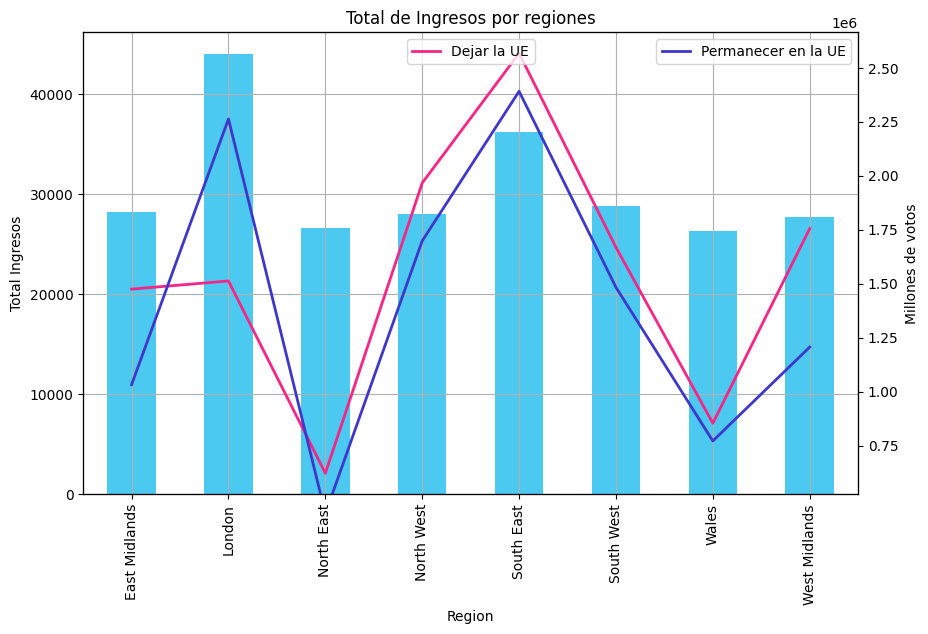

In [365]:
frequency = df_regions.groupby("Region").mean()

chart_voters(frequency['Mean_Income'], df_regions, 'Total de Ingresos por regiones', 
             'Total Ingresos', ['#4cc9f0', '#f72585', '#3f37c9'])

## 5.5. Gente sin trabajo

Cargamos en un dataframe la hoja **KS601EW_Percentages** y exploramos su estructura y datos.

In [366]:
unemployed_file = "r21ewrttableks601ewladv1_tcm77-290745.xls"

df_unemployed = pd.read_excel(io=unemployed_file, sheet_name="KS601EW_Percentages", header=10, usecols=("A,I"), skiprows=[11,12,13])
df_unemployed.head()

,Area code,Economically active: Unemployed
0,K04000001,4.4
1,NaN,NaN
2,E92000001,4.4
3,NaN,NaN
4,E12000001,5.4


Removemos nulos y nos quedamos con un dataset que contenga únicamente un Área válida y obtenemos el porcentaje de personas desempleadas por área.

In [367]:
df_unemployed.rename(index=str, inplace=True, columns={"Area code": "Area_Code", })
df_unemployed["Pct_Unemployed"] = df_unemployed[df_unemployed.columns[1]]
df_unemployed = df_unemployed[["Area_Code", "Pct_Unemployed"]]
df_unemployed = df_unemployed.dropna(how='any')
df_unemployed.head()

,Area_Code,Pct_Unemployed
0,K04000001,4.4
2,E92000001,4.4
4,E12000001,5.4
6,E06000047,4.4
7,E06000005,5.2


Hacemos merge del porcentaje de residentes desemploeados por área al dataframe del Referendum.

In [368]:
df_referendum = df_referendum.merge(df_unemployed, on='Area_Code')
df_referendum.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected,Median_Age,Pct_High_Education,Pct_No_UK,Pct_Unemployed
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,32,7,38,39.11,60.89,0.09,35.0,31.028063,20.6,5.1
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,85,0,50,43.45,56.55,0.16,32.0,33.331842,30.9,5.7
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,21,0,48,41.92,58.08,0.07,40.0,33.242546,9.9,5.0
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,8,3,23,27.72,72.28,0.04,36.0,28.363059,12.0,5.4
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,26,1,42,48.22,51.78,0.08,39.0,39.960753,17.6,4.4


Ahora generamos un gráfico combinado del porcentaje de residentes desempleados por Región, junto con los votos a favor y encontra de dejar la UE.

<ipython-input-369-2502d8eb6a16>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  frequency = df_referendum.groupby("Region").mean()
<ipython-input-369-2502d8eb6a16>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exposition = df_referendum.groupby("Region").sum()


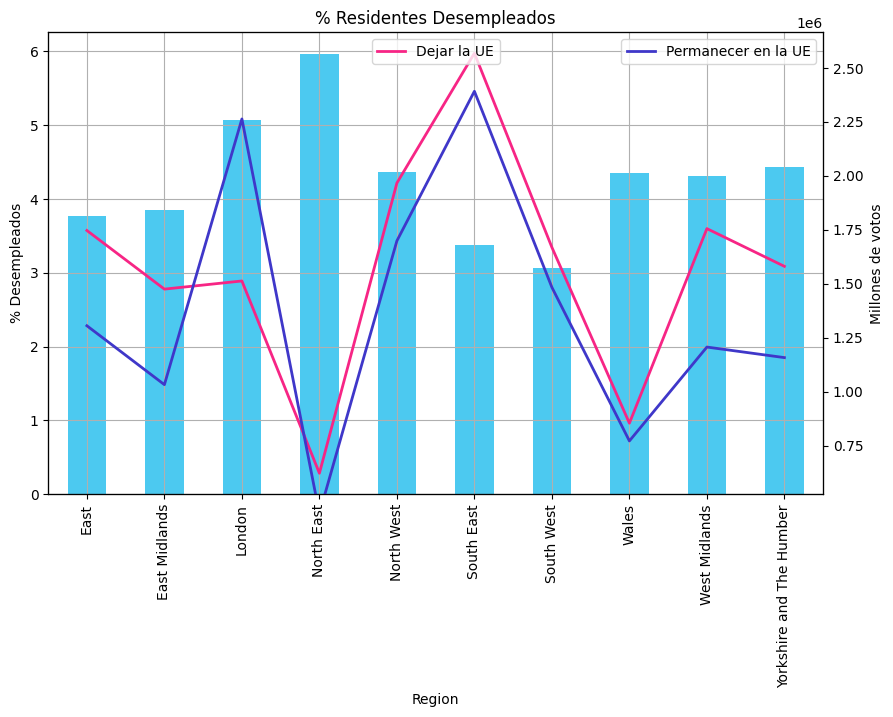

In [369]:
frequency = df_referendum.groupby("Region").mean()
exposition = df_referendum.groupby("Region").sum()

chart_voters(frequency['Pct_Unemployed'], exposition, '% Residentes Desempleados', 
             '% Desempleados', ['#4cc9f0', '#f72585', '#3f37c9'])